### Goal
In this study, I will perform an exploratory data analysis of the adult income dataset available on Kaggle (https://www.kaggle.com/wenruliu/adult-income-dataset?select=adult.csv) and try to find some insights from the data.

In [2]:
#Importing the important libreres

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the data into a pandas dataframe

data = pd.read_csv('adult.csv')

In [5]:
#Printing the five rows of the data

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Seems like all the missing values are represented by '?' sign. We need to replace it with NaN.

In [7]:
data = data.replace('?', np.nan)

In [8]:
# Typecheck

data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [10]:
# Check for missing values in each columns

data.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [19]:
# Applying describe method for descriptive analysis of each columns

data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- Workclass and occupation were collected from the same source, both are missing concurrently. 
- There is a significant of amount of missing values in native country column.

Text(0, 0.5, 'Count')

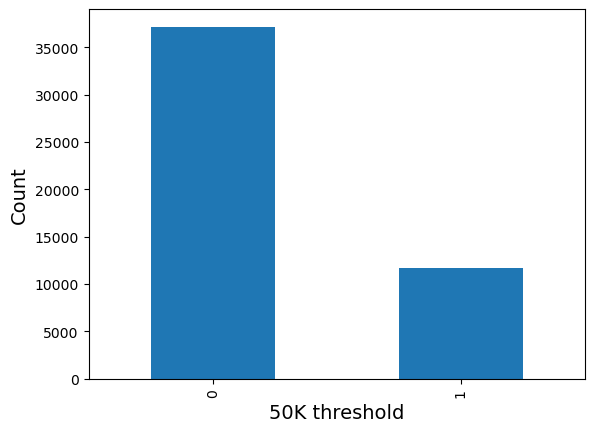

In [21]:
# Create a binary column to indicate wheather a person earns more than 50K or not

data['50K_threshold'] = data.apply(lambda x: 1 if x['income'] == '>50K' else 0, axis=1)

# Plot the count of people meeting the 50K income threshold criteria or not
data['50K_threshold'].value_counts().plot(kind='bar')
plt.xlabel('50K threshold', fontsize=14)
plt.ylabel('Count', fontsize=14)


It seems like people who don't meet the 50K income threshold criteria are three times greater than people meeting the 50K income



Text(0, 0.5, 'Count')

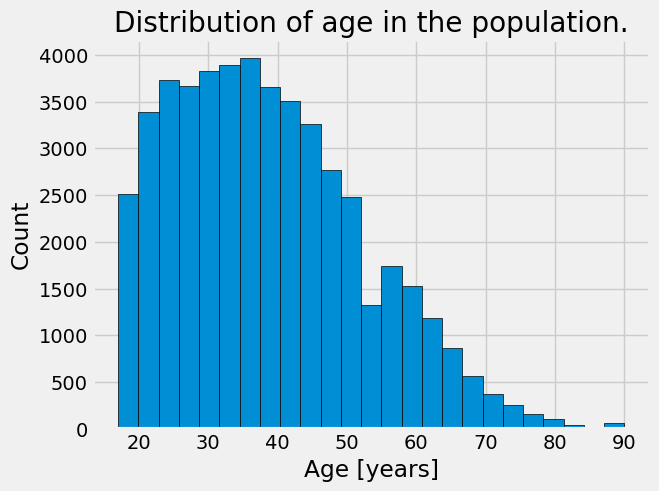

In [22]:
# Plot the income based on age bracket

plt.style.use('fivethirtyeight')

plt.hist(data['age'], edgecolor = 'k', bins = 25)
plt.title('Distribution of age in the population.') 
plt.xlabel('Age [years]')
plt.ylabel('Count')

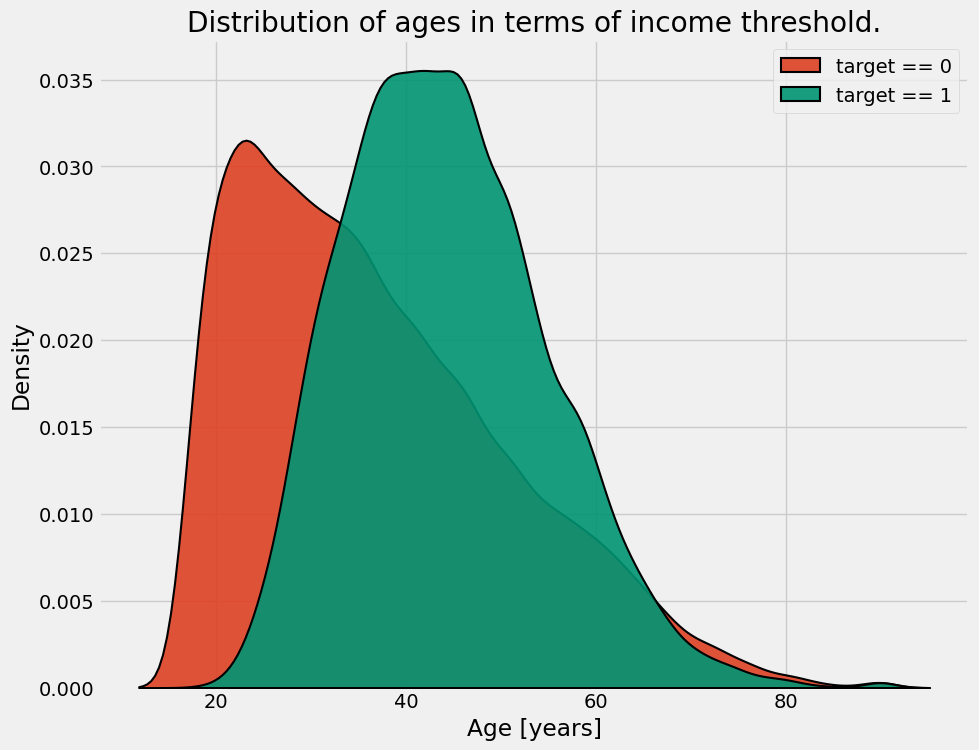

In [23]:
# colours
low_c = '#dd4124'
high_c = '#009473'

plt.figure(figsize = (10, 8))

sns.kdeplot(data.loc[data['50K_threshold'] == 0, 'age'], label = 'target == 0', color=low_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3)
sns.kdeplot(data.loc[data['50K_threshold'] == 1, 'age'], label = 'target == 1', color=high_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3)

plt.xlabel('Age [years]')
plt.ylabel('Density')
plt.title('Distribution of ages in terms of income threshold.')
plt.legend()

As expected, people in their late 30's and 40's has the highest percentage of high earners, while young population who are just entering the workforce are low earners.

In [24]:
data_age_binned = data[['age', '50K_threshold']]
data_age_binned['age_binned'] = pd.cut(data_age_binned['age'], bins = np.linspace(15, 90, num = 16))
data_age_binned.head(10)

/var/folders/3t/zg2pg4h96j33j992z6f26cgh0000gn/T/ipykernel_97694/172723432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_binned['age_binned'] = pd.cut(data_age_binned['age'], bins = np.linspace(15, 90, num = 16))


,age,50K_threshold,age_binned
0,25,0,"(20.0, 25.0]"
1,38,0,"(35.0, 40.0]"
2,28,1,"(25.0, 30.0]"
3,44,1,"(40.0, 45.0]"
4,18,0,"(15.0, 20.0]"
5,34,0,"(30.0, 35.0]"
6,29,0,"(25.0, 30.0]"
7,63,1,"(60.0, 65.0]"
8,24,0,"(20.0, 25.0]"
9,55,0,"(50.0, 55.0]"


Text(0, 0.5, 'Income above 50K in percentage')

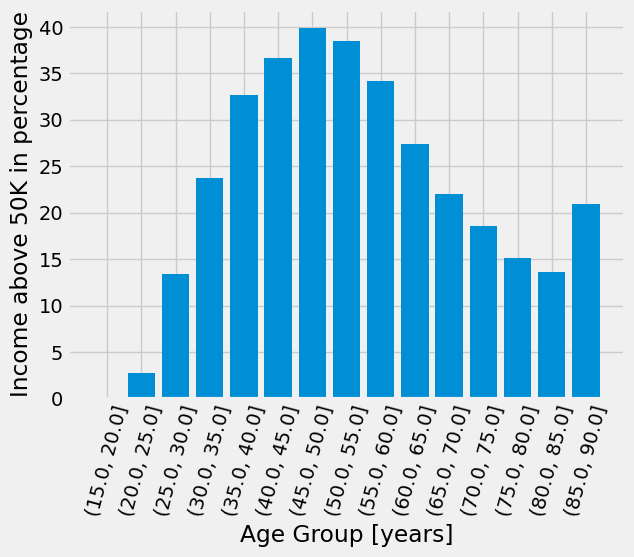

In [25]:
age_groups  = data_age_binned.groupby('age_binned').mean()
plt.bar(age_groups.index.astype(str), 100 * age_groups['50K_threshold'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group [years]')
plt.ylabel('Income above 50K in percentage')

It further reonforces our finding in the previous section that people withing 35-55 age range has the highest percentage of 50K+ earnings.



Text(0, 0.5, 'Income above 50K in percentage')

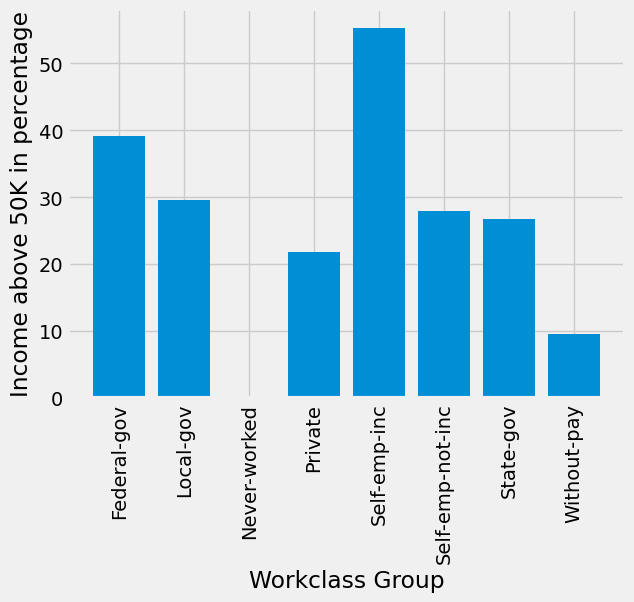

In [26]:
workclass_groups  = data.groupby('workclass').mean()
plt.bar(workclass_groups.index.astype(str), 100 * workclass_groups['50K_threshold'])
plt.xticks(rotation = 90)
plt.xlabel('Workclass Group')
plt.ylabel('Income above 50K in percentage')

People who never worked or without pay has no earning and hence there percentage is 0 for 50K+ earning. Of the other working class, self-employed has the highest percentage of 50K+ earners. Next, federal gov. employees are also mostly high earners (~40%). Surprisingly, contrary to popular belief private sector has only about 25% high earners. Most likely reason is the income inequality is higher is private sector as the people in the higher up in the hierarchy is usually paid disporportionately higher.

<AxesSubplot:xlabel='50K_threshold', ylabel='fnlwgt'>

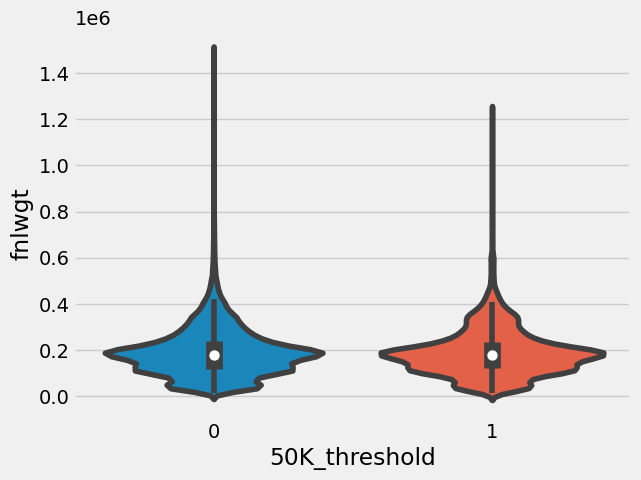

In [27]:
sns.violinplot(data=data, x='50K_threshold', y='fnlwgt')

There is no significant difference between high-earners and low-earners, except low earners tend to have more outlier in the high fnlwgt region.



/Users/tsaijungwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

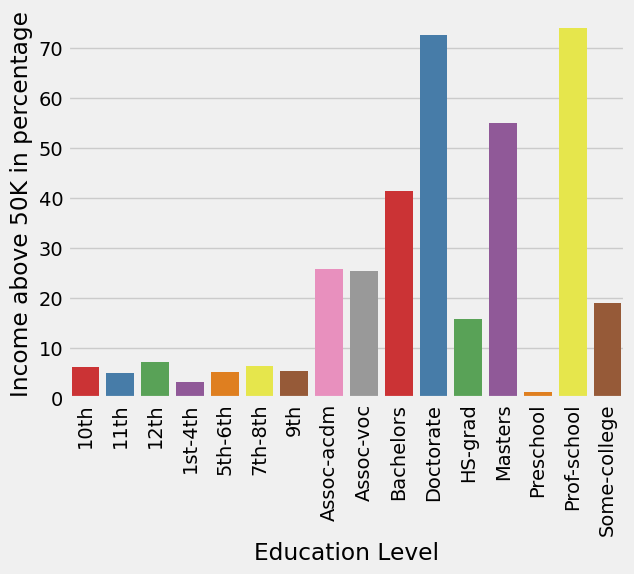

In [28]:
education_groups  = data.groupby('education').mean()
sns.barplot(education_groups.index.astype(str), 100 * education_groups['50K_threshold'], palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.ylabel('Income above 50K in percentage')

Doctorates and professionals are amongst the highest earners for all education class. Not surprisingly, income is highly correlated with the education level.



/Users/tsaijungwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

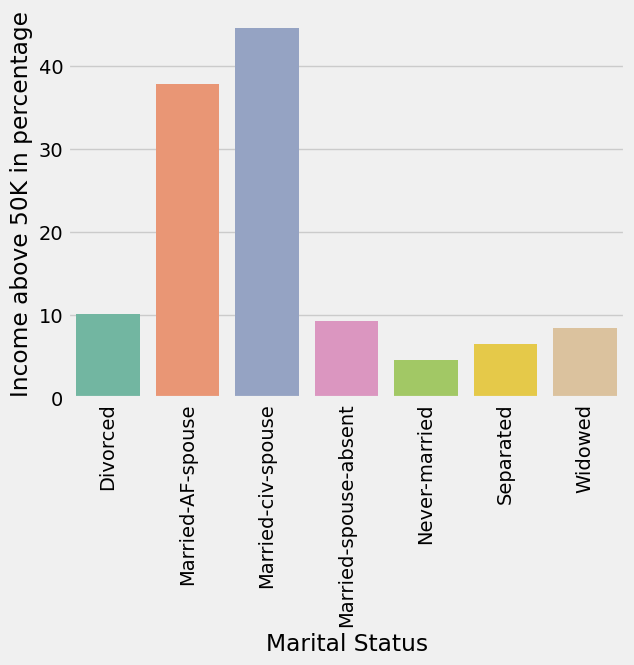

In [29]:
marital_groups  = data.groupby('marital-status').mean()
sns.barplot(marital_groups.index.astype(str), 100 * marital_groups['50K_threshold'], palette='Set2')
plt.xticks(rotation = 90)
plt.xlabel('Marital Status')
plt.ylabel('Income above 50K in percentage')

It also seems like earning is highly correlated with the marital status. Marriage may act as a source of inspiration or motivation which results in higher earning. Or high earners tend to have higher education and in turn they value marriage more.

/Users/tsaijungwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

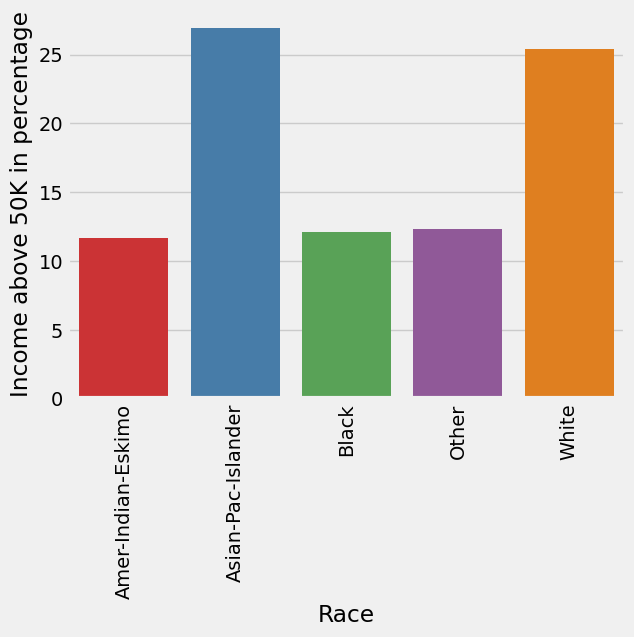

In [30]:
race_groups  = data.groupby('race').mean()
sns.barplot(race_groups.index.astype(str), 100 * race_groups['50K_threshold'], palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Race')
plt.ylabel('Income above 50K in percentage')

Whites and Asian Pacific Islanders has the highest percentage of high earners, while Blacks, American Indian Eskimos, and other are the low earners.



/Users/tsaijungwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

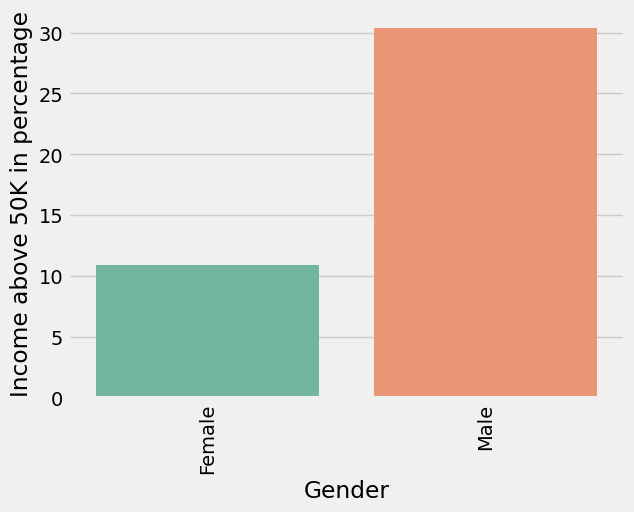

In [31]:
sex_groups  = data.groupby('gender').mean()
sns.barplot(sex_groups.index.astype(str), 100 * sex_groups['50K_threshold'], palette='Set2')
plt.xticks(rotation = 90)
plt.xlabel('Gender')
plt.ylabel('Income above 50K in percentage')

Not surprisingly, man has a higher percentage of high earners than woman. We still have a long way to go to achieve gender parity in terms of financial empowerment.

<AxesSubplot:xlabel='50K_threshold', ylabel='hours-per-week'>

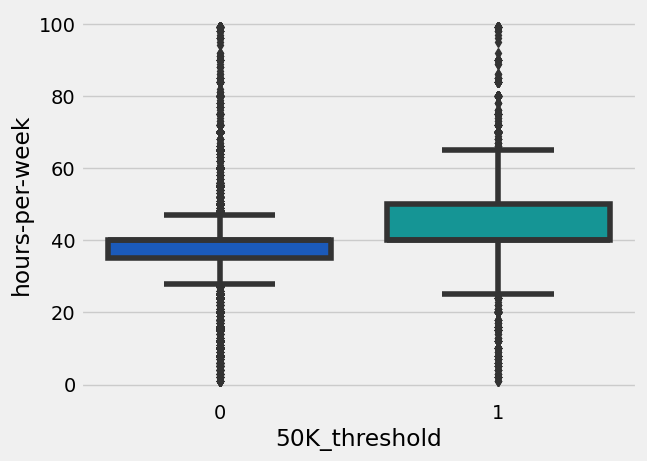

In [32]:
sns.boxplot(data=data, x='50K_threshold', y='hours-per-week', palette='winter')


High earners tend to work longer hours than the low earners. Most of the high earners work around 40-50 hours a week while low earners work about 35-40 hours a week.